<a href="https://colab.research.google.com/github/ahmedraufk/nfl-longevity-predictor/blob/main/NFL_Longevity_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Longevity Predictor For the NFL Combine**

Importing Libraries

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Loading DataSets

In [2]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
rb_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_rb.csv')
qb_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_qb.csv')
skill_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_skill.csv')
trenches_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_trenches.csv')
lineb_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_linebackers.csv')





#QB Data Analysis

In [4]:
#Data Analysis 

#qb_df = qb_df.drop(columns = ['Index','Name','Position'])
#normalized_qb_df=(qb_df-qb_df.min())/(qb_df.max()-qb_df.min())
#qb_df = qb_df[qb_df.Games != 0]
print(qb_df)

     Index            Name Position  Height  Weight  Forty  Vertical  \
0        0      Alex Brink       QB      74     211   4.96      28.0   
1        1     Andrew Luck       QB      76     234   4.59      36.0   
2        2     Andy Dalton       QB      74     215   4.83      29.5   
3        3    Austin Davis       QB      74     219   4.69      31.0   
4        4  Blaine Gabbert       QB      76     234   4.61      33.5   
..     ...             ...      ...     ...     ...    ...       ...   
102    102       Tony Pike       QB      78     223   4.90      28.5   
103    103       Tony Romo       QB      74     230   5.01      30.0   
104    104     Tyler Palko       QB      73     215   4.83      31.5   
105    105    Tyrod Taylor       QB      73     217   4.47      37.5   
106    106    Zac Robinson       QB      74     214   4.68      35.0   

     Broadjump  Cone  Shuttle  Games  Probowls  
0          112  7.22     4.19      0         0  
1          124  6.80     4.28     86 

# New Section

              Name Position  Height  Weight  Forty  Vertical  Broadjump  Cone  \
1     Aaron Fields       DE      76     243   4.76      34.0      115.0  7.51   
2     Aaron Maybin       DE      76     249   4.64      38.0      124.0  7.52   
3    Aaron Schobel       DE      76     263   4.75      38.0      119.0  7.16   
4    Adam Carriker       DE      78     296   4.90      33.5      110.0  7.06   
7       Adam Koets       OT      77     298   5.08      32.0      106.0  7.44   
..             ...      ...     ...     ...    ...       ...        ...   ...   
98       Tim Tebow       QB      75     236   4.71      38.5      115.0  6.66   
99      Todd Husak       QB      75     216   5.20      27.5       99.0  7.17   
100      Tom Brady       QB      76     211   5.28      24.5       99.0  7.20   
102      Tony Pike       QB      78     223   4.90      28.5      108.0  7.06   
105   Tyrod Taylor       QB      73     217   4.47      37.5      126.0  6.78   

     Shuttle  Games  Probow

array([  1. ,  55.5, 110. , 164.5, 219. , 273.5, 328. ])

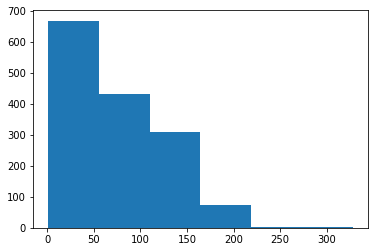

In [5]:
qb_copy = qb_df.copy()
trenches_copy = trenches_df.copy()
skills_copy = skill_df.copy()
lineb_copy = lineb_df.copy()
rb_copy = rb_df.copy()

trenches_copy = trenches_copy.drop(columns =['Benchpress','Index'])
skills_copy = skills_copy.drop(columns = ['Benchpress','Index'])
lineb_copy = lineb_copy.drop(columns = ['Benchpress','Index'])
rb_copy = rb_copy.drop(columns = ['Benchpress','Index'])
qb_copy = qb_copy.drop(columns = ['Index'])

df = pd.concat([trenches_copy,skills_copy,lineb_copy,rb_copy,qb_copy])


df = df[df.Games != 0]

print(df)
#sns.pairplot(df,hue = "Games",height = 2, diag_kind = "kde")
#encoder = OneHotEncoder(handle_unknown='ignore')

"""
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Position']]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
df = df.join(encoder_df)
print(df)
df[df.columns[1:]].corr()['Games'][:].sort_values(ascending=False).to_frame()
"""
df[df.columns[1:]].corr()['Probowls'][:].sort_values(ascending=False).to_frame()
plt.hist(df['Games'],bins = 6)[1]
#plt.show()

In [6]:
def make_bins(df):
   label_names = ["0-50", "50-100","100-150","150-200","200-330",">330" ]
   cut_points = [  0 ,  55, 110. , 164, 219. , 273,328]
   df["Games_Range"] = pd.cut(df["Games"], cut_points, labels=label_names)
   return df
df = make_bins(df)

print(df)
df.to_csv(r'/content/drive/MyDrive/MLProject/data_all.csv')

              Name Position  Height  Weight  Forty  Vertical  Broadjump  Cone  \
1     Aaron Fields       DE      76     243   4.76      34.0      115.0  7.51   
2     Aaron Maybin       DE      76     249   4.64      38.0      124.0  7.52   
3    Aaron Schobel       DE      76     263   4.75      38.0      119.0  7.16   
4    Adam Carriker       DE      78     296   4.90      33.5      110.0  7.06   
7       Adam Koets       OT      77     298   5.08      32.0      106.0  7.44   
..             ...      ...     ...     ...    ...       ...        ...   ...   
98       Tim Tebow       QB      75     236   4.71      38.5      115.0  6.66   
99      Todd Husak       QB      75     216   5.20      27.5       99.0  7.17   
100      Tom Brady       QB      76     211   5.28      24.5       99.0  7.20   
102      Tony Pike       QB      78     223   4.90      28.5      108.0  7.06   
105   Tyrod Taylor       QB      73     217   4.47      37.5      126.0  6.78   

     Shuttle  Games  Probow

In [7]:
df = df.reset_index()
print(df)

      index           Name Position  Height  Weight  Forty  Vertical  \
0         1   Aaron Fields       DE      76     243   4.76      34.0   
1         2   Aaron Maybin       DE      76     249   4.64      38.0   
2         3  Aaron Schobel       DE      76     263   4.75      38.0   
3         4  Adam Carriker       DE      78     296   4.90      33.5   
4         7     Adam Koets       OT      77     298   5.08      32.0   
...     ...            ...      ...     ...     ...    ...       ...   
1485     98      Tim Tebow       QB      75     236   4.71      38.5   
1486     99     Todd Husak       QB      75     216   5.20      27.5   
1487    100      Tom Brady       QB      76     211   5.28      24.5   
1488    102      Tony Pike       QB      78     223   4.90      28.5   
1489    105   Tyrod Taylor       QB      73     217   4.47      37.5   

      Broadjump  Cone  Shuttle  Games  Probowls Games_Range  
0         115.0  7.51     4.56      3         0        0-50  
1         1

In [ ]:

#sns.pairplot(df, hue="Games_Range", height=2, diag_kind="kde")

##Model

In [8]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Games_Range_Encoded']= label_encoder.fit_transform(df['Games_Range'])

print(df)

      index           Name Position  Height  Weight  Forty  Vertical  \
0         1   Aaron Fields       DE      76     243   4.76      34.0   
1         2   Aaron Maybin       DE      76     249   4.64      38.0   
2         3  Aaron Schobel       DE      76     263   4.75      38.0   
3         4  Adam Carriker       DE      78     296   4.90      33.5   
4         7     Adam Koets       OT      77     298   5.08      32.0   
...     ...            ...      ...     ...     ...    ...       ...   
1485     98      Tim Tebow       QB      75     236   4.71      38.5   
1486     99     Todd Husak       QB      75     216   5.20      27.5   
1487    100      Tom Brady       QB      76     211   5.28      24.5   
1488    102      Tony Pike       QB      78     223   4.90      28.5   
1489    105   Tyrod Taylor       QB      73     217   4.47      37.5   

      Broadjump  Cone  Shuttle  Games  Probowls Games_Range  \
0         115.0  7.51     4.56      3         0        0-50   
1        

##Feature Selection


In [9]:
qb_features = ['Height','Weight','Forty','Cone','Shuttle','Broadjump']
from sklearn.feature_selection import SelectKBest, chi2

#qb_features = ['Vertical']
#Extract Features
X = df.loc[:,qb_features].values
Y = df.loc[:,['Games_Range']].values
#X = df[qb_features]
print(X.shape)
#Y = df['Games']
#print(df['Games'])
#X = SelectKBest(chi2, k=4).fit_transform(X, Y)
print(Y)


(1490, 6)
[['0-50']
 ['0-50']
 ['100-150']
 ...
 ['>330']
 ['0-50']
 ['50-100']]


Training Split


In [10]:
#Model_selection and train/test Split
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

Normalizing Data

In [11]:
X_sc = StandardScaler()
#Y_sc = StandardScaler()
X_train_norm = X_sc.fit_transform(X_train)
X_test_norm = X_sc.transform(X_test)
#X_test_norm = SelectKBest(chi2, k=4).fit_transform(X_train, Y)
print(X_train_norm.shape)


(1192, 6)


Dimension Reduction Using PCA

In [12]:
from sklearn.decomposition import PCA

##PCA
pca = PCA(n_components = 2)
  
X_train_norm = pca.fit_transform(X_train)
X_test_norm = pca.transform(X_test)


Training Models

In [13]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2






clf_ob = svm.SVC().fit(X_train_norm, Y_train.ravel())
rfc_ob = RandomForestClassifier().fit(X_train_norm, Y_train.ravel())
lg = LogisticRegression(max_iter = 3000).fit(X_train_norm,Y_train.ravel())
gb = GaussianNB().fit(X_train_norm,Y_train.ravel())


In [14]:
print(clf_ob.score(X_test_norm, Y_test))

0.44966442953020136


In [15]:
print(rfc_ob.score(X_test_norm, Y_test))

0.37919463087248323


In [16]:
print(lg.score(X_test_norm, Y_test))

0.4429530201342282


In [17]:
print(gb.score(X_test_norm, Y_test))

0.4463087248322148


##Neural Network Model

In [97]:
from pickle import TRUE
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 10000, solver = 'lbfgs', alpha = 1, hidden_layer_sizes=(50,50,50)).fit(X_test_norm,Y_test.ravel())
print(mlp)

MLPClassifier(alpha=1, hidden_layer_sizes=(50, 50, 50), max_iter=10000,
              solver='lbfgs')


In [98]:
print(mlp
      .score(X_test_norm, Y_test))

0.7181208053691275


In [99]:
print(mlp
      .score(X_train_norm, Y_train))

0.3624161073825503


In [100]:
from sklearn.metrics import classification_report

y_pred = mlp.predict(X_test_norm)

[print(classification_report(Y_test,y_pred))]

              precision    recall  f1-score   support

        0-50       0.75      0.80      0.78       134
     100-150       0.71      0.73      0.72        62
     150-200       1.00      0.06      0.12        16
     200-330       1.00      0.50      0.67         2
      50-100       0.66      0.71      0.68        83
        >330       1.00      1.00      1.00         1

    accuracy                           0.72       298
   macro avg       0.85      0.63      0.66       298
weighted avg       0.73      0.72      0.70       298



[None]

In [ ]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
import numpy as np


fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train_norm, Y_train.ravel(), clf=clf_ob,legend = 2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
print(clf_ob.score(X_test_norm, Y_test))
#print(rfc_ob.score(X_test_norm, Y_test))
#print(mlp.score(X_test_norm, Y_test))
#print(cnb.score(X_test_norm, Y_test))
print(km.score(X_test_norm, Y_test))
print(dt.score(X_test_norm, Y_test))
print(lg.score(X_test_norm, Y_test))
print(sgb.score(X_test_norm, Y_test))
print(eln.score(X_test_norm, Y_test))

0.4463087248322148


NameError: ignored

In [ ]:
print(regressor.score(X_test_norm,Y_test.ravel()))

NameError: ignored

In [ ]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklego.meta import ZeroInflatedRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
                       max_iter = 20000,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train_norm, Y_train.ravel())


In [ ]:
y_pred = newReg.predict(X_test_norm)
#print(Y_train)
df_temp = pd.DataFrame({'Actual': Y_test.ravel(), 'Predicted': y_pred})
df_temp.head()

df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
mlp_reg.score(X_test_norm,Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
#y_pred = zir.predict(X_test)
#print(RFG_qb.score(X_sc.transform(X_test),Y_sc.transform(Y_test)))
plt.scatter(y_pred, Y_test.ravel())
plt.xlabel("Y-Pred")
plt.ylabel("Y-test")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#qb_svc.score(X_test_norm, Y_test_norm)
print('ZIR (RFC+RFR) r²:', cross_val_score(zir, X_test_norm, Y_test_norm.ravel()).mean())
print('RFR r²:', cross_val_score(RandomForestRegressor(random_state=0), X_test_norm, Y_test_norm.ravel()).mean())
#print(rfr_qb.score(X_test_norm,Y_test_norm))
mse = mean_squared_error(Y_test_norm, y_pred)
r2 = r2_score(Y_test_norm,y_pred)
print('R2 = ', r2 )
rmse = mse**.5
print(mse)
print(rmse)

In [ ]:
len(X)

In [ ]:
LGB_PARAMS = {
    'num_leaves': 1023,
    'objective': 'binary',
    'metric': 'rmse'
}

In [ ]:
train_lgb = lgb.Dataset(X_train, label=Y_train.ravel())
test_lgb = lgb.Dataset(X_test, label=Y_test.ravel(), reference=train_lgb)

In [ ]:
lgb_model = lgb.train(LGB_PARAMS, train_lgb, num_boost_round=20, valid_sets=[test_lgb])

NameError: ignored